# Imports

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Data read, visualization and clear

In [25]:
df = pd.read_csv('train.csv')

pd.set_option('display.max_columns', None)

df

,Unnamed: 0,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3
1,462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,92.0,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0
2,2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6
3,2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9
4,381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1638,Malta,2011,Developed,59.0,0,6.91,3601.287457,82.0,3,68.0,0,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8,87.0
2346,1095,Guinea-Bissau,2010,Developing,287.0,4,3.21,53.307827,83.0,26,23.1,7,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9,56.7
2347,1130,Haiti,2007,Developing,266.0,17,6.08,56.778587,92.0,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4,61.8
2348,1294,Italy,2003,Developed,72.0,2,9.30,3519.258515,95.0,10982,57.0,3,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4,79.9


In [26]:
df.describe()

,Unnamed: 0,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,1477.608085,2007.537447,165.749787,28.793191,4.536911,720.521353,83.170213,2318.703404,38.613574,40.094468,82.755319,5.921921,82.440000,1.787064,6559.900842,9.609107e+06,4.782979,4.820596,0.633644,12.043064,69.286766
std,847.461601,4.611986,125.066557,111.836006,3.902423,1952.616462,22.778758,11589.618520,19.965111,152.939537,23.307104,2.409241,23.736519,5.266324,13256.540660,4.860792e+07,4.381124,4.460068,0.201977,3.254157,9.557714
min,0.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,0.650000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,745.500000,2004.000000,74.000000,0.000000,1.100000,5.491010,83.000000,0.000000,19.600000,0.000000,78.000000,4.372500,78.000000,0.100000,564.088121,3.949550e+05,1.600000,1.600000,0.509000,10.300000,63.300000
50%,1486.500000,2008.000000,144.000000,3.000000,3.755000,65.611455,92.000000,16.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.200000
75%,2207.750000,2012.000000,227.000000,20.750000,7.327500,441.534144,96.000000,356.250000,56.100000,26.000000,97.000000,7.340000,97.000000,0.800000,4827.824542,4.671562e+06,7.075000,7.100000,0.773000,14.200000,75.700000
max,2936.000000,2015.000000,723.000000,1800.000000,17.310000,19099.045060,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Adult Mortality                  2350 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      2350 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2350 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio               

In [28]:
df.duplicated().value_counts()

False    2350
Name: count, dtype: int64

In [29]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [30]:
df['Country'] = df['Country'].str.capitalize()

In [31]:

le=LabelEncoder()

df['Status']= le.fit_transform(df['Status'])
print(df['Status'].head(5)) #1 devoloping 0 devoloped

df['Country_encoded'] = le.fit_transform(df['Country'])
print(df['Country_encoded'].head(5)) 

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64
0     27
1     27
2    143
3    174
4     23
Name: Country_encoded, dtype: int64


In [32]:
print(df.columns)

df.columns = df.columns.map(lambda x: x.strip())
print(df.columns)

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy ',
       'Country_encoded'],
      dtype='object')
Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy', 'Country_encoded'],
      dtype='object')


In [33]:
df.max()

Unnamed: 0                                 2936
Country                                Zimbabwe
Year                                       2015
Status                                        1
Adult Mortality                           723.0
infant deaths                              1800
Alcohol                                   17.31
percentage expenditure              19099.04506
Hepatitis B                                99.0
Measles                                  212183
BMI                                        87.3
under-five deaths                          2500
Polio                                      99.0
Total expenditure                         17.24
Diphtheria                                 99.0
HIV/AIDS                                   50.6
GDP                                  115761.577
Population                         1293859294.0
thinness  1-19 years                       27.7
thinness 5-9 years                         28.6
Income composition of resources         

# Data Visualization

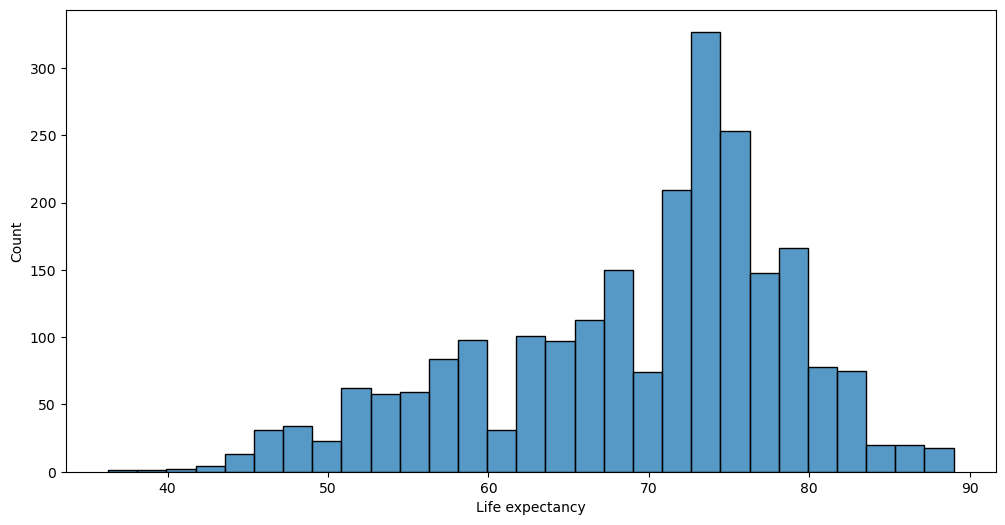

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df['Life expectancy'], edgecolor='black')
plt.show()

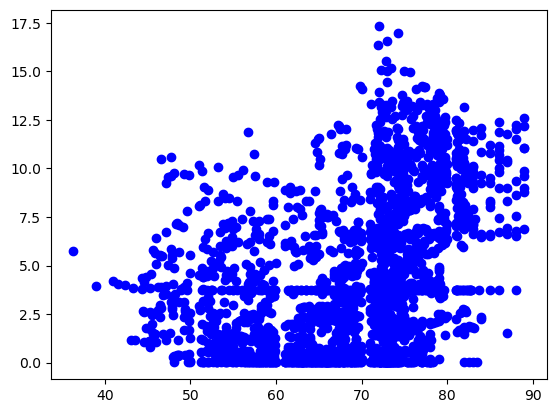

In [35]:
plt.scatter(df['Life expectancy'] , df['Alcohol'], color='blue')  
plt.show()

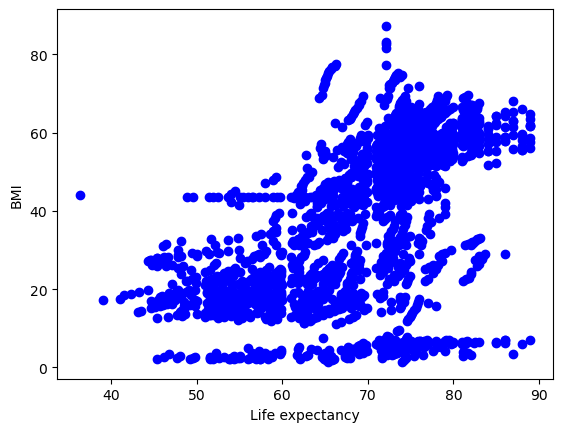

In [36]:
plt.scatter(df['Life expectancy'] , df['BMI'], color='blue')  
plt.xlabel('Life expectancy')
plt.ylabel('BMI')
plt.show()

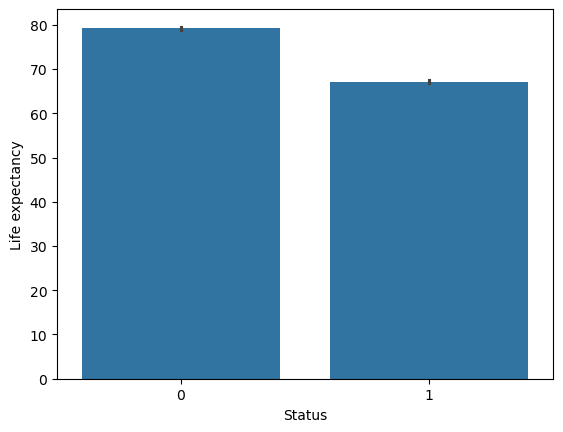

In [37]:
sns.barplot(x="Status", y='Life expectancy', data=df)
plt.show()

# Feature Selection

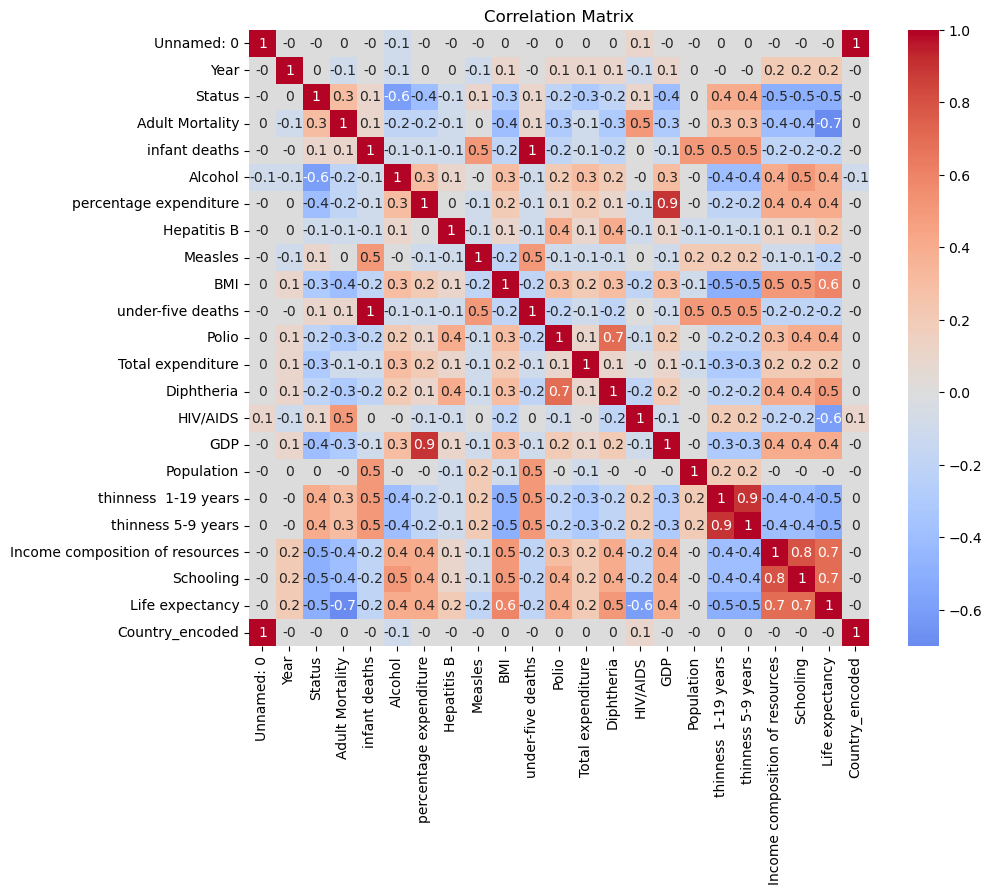

In [38]:
# Correlation matrix

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number'])

correlation_matr= numeric_columns.corr().round(1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Selected Features Shape: (2350, 5)


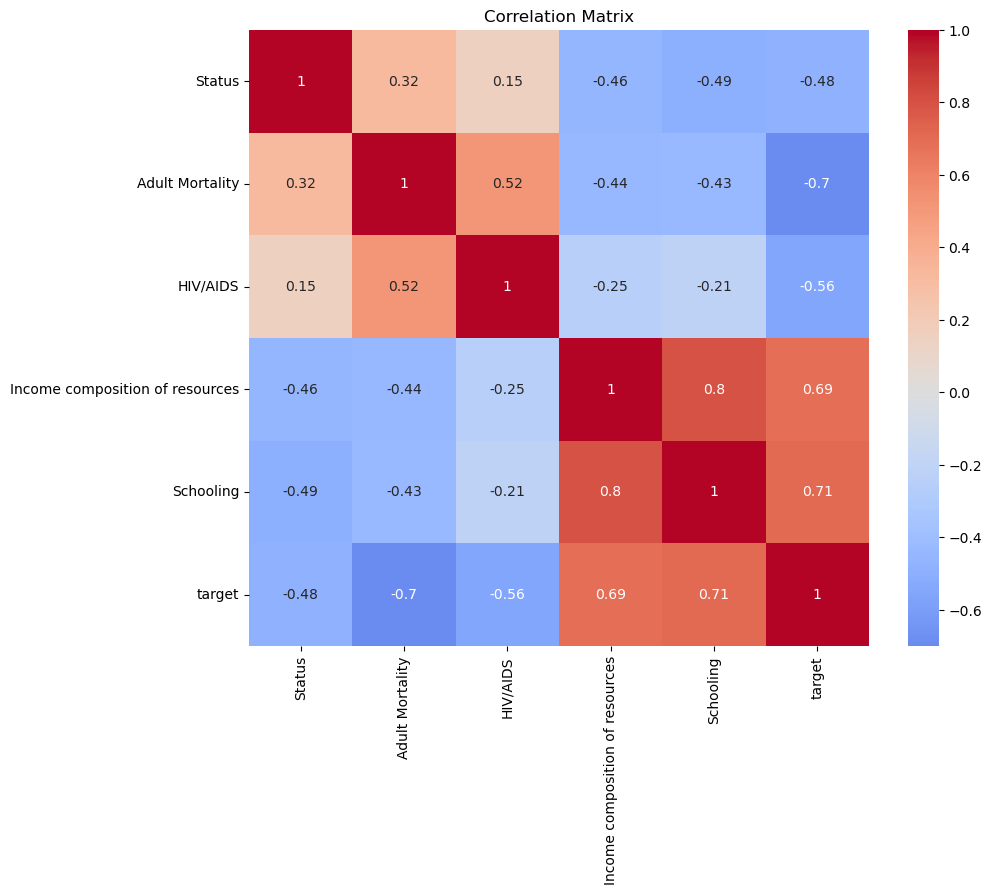

In [39]:
X_df = df.drop(columns=['Life expectancy', 'Country'])
y_df = df['Life expectancy']


# Filter Method for Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(X_df, y_df)

print("Selected Features Shape:", selected_features.shape)
selected_feature_names = X_df.columns[selector.get_support()] 

selected_df = df[selected_feature_names].copy()
selected_df['target']=df['Life expectancy']


# Correlation matrix

correlation_matr= selected_df.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Calculating VIF (Variance Inflation Factor) to check for multicollinearity


X_2 = selected_df.drop(columns=['target','Schooling'])
y = selected_df['target']

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_2.columns
vif_data['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]

print(vif_data)

                           Feature       VIF
0                           Status  4.391625
1                  Adult Mortality  3.820500
2                         HIV/AIDS  1.537419
3  Income composition of resources  2.942100


# Creation Model

In [41]:
#X_2 have the correct columns

X_train, X_test, y_train, y_test = train_test_split(X_2, y_df, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Crear un Pipeline con un paso genérico para el modelo
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Para la regresión polinómica
    ('model', LinearRegression())  # Este será sustituido en el GridSearch
])

# Definir los hiperparámetros para cada modelo
param_grid = [
    # Regresión Lineal con diferentes grados
    {
        'poly__degree': [1, 2, 3, 4],  # Grados para la regresión polinómica
        'model': [LinearRegression()]
    },
    # Ridge Regression
    {
        'poly__degree': [1],  # No aplicar polinomio
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0]  # Regularización Ridge
    },
    # Lasso Regression
    {
        'poly__degree': [1],  # No aplicar polinomio
        'model': [Lasso()],
        'model__alpha': [0.1, 1.0, 10.0]  # Regularización Lasso
    }
]

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',  # Usamos el error cuadrático medio
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar el GridSearch
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el modelo ganador
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Predecir con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# Mostrar el modelo final seleccionado
print("Best Model:", best_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........model=LinearRegression(), poly__degree=1; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=1; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=1; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=1; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=2; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=1; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=2; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=2; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=2; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=2; total time=   0.0s
[CV] END ...........model=LinearRegression(), poly__degree=3; total time=   0.0s
[CV] END ...........model=LinearRegression(), po

# Applied changes to test 

In [43]:
df_test = pd.read_csv('test.csv')

df_test['Country'] = df_test['Country'].str.capitalize()

le=LabelEncoder()

df_test['Status']= le.fit_transform(df_test['Status'])

df_test['Country_encoded'] = le.fit_transform(df_test['Country'])

df_test.columns = df_test.columns.map(lambda x: x.strip())

df_test= df_test.drop(columns=[col for col in df_test.columns if col not in X_2.columns])

# Predict test

In [44]:
y_pred = best_model.predict(df_test)

In [45]:
predict_csv = pd.DataFrame()
predict_csv['ID']= 0
predict_csv['Life expectancy']= y_pred
predict_csv['ID']= predict_csv.index+1
predict_csv

,ID,Life expectancy
0,1,72.765201
1,2,76.094303
2,3,75.408569
3,4,76.516588
4,5,55.979007
...,...,...
583,584,55.284321
584,585,76.872408
585,586,61.487897
586,587,71.704859


In [46]:
predict_csv.to_csv('predict.csv', index=False)